# NHANES Exploratory Data Analysis

## Introduction
This is an Exploratory Data Analysis using Python of the "NHANES" dataset. The purpose of this project is to find out and visualize the data's main characteristics and trends using statistical methods and data visualization techniques.


## About the data
The NHAMES dataset can be found on the [CDC - Centers for Disease Control and Prevention website](https://www.cdc.gov/nchs/nhanes/). It  is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. 

For two-year cycles (e.g., 2015-2016), cross-sectional national samples of individuals living in the United States are invited to participate in both aspects of the data collection. The data produced are widely considered by the research community as among the most important scientific indicators of the health and well-being of the U.S. population.

For this exploratory analysis, we will be analyzing data collected from a national sample of individuals during the 2015-2016 cycle. 


## Objective
The purpose of this analysis is to answer the following questions:
* Does gender determine marital status?
* Does age affect an individuals marital status?
* Are there significant differences between the male and female marital statuses within the varying age groups?
* Who is often taller, males or females?
* Are there significant differences between the first and second systolic blood pressure readings?
* Does household size affect educational attainment?
* Does age group affect educational attainment?
* What is the effect of a combination of age and household size on educational attainment?






## Data Preparation

Importing libraries and loading dataset

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

### Retrieving the list of all column names and types

In [14]:
print(da.columns.values)

['SEQN' 'ALQ101' 'ALQ110' 'ALQ130' 'SMQ020' 'RIAGENDR' 'RIDAGEYR'
 'RIDRETH1' 'DMDCITZN' 'DMDEDUC2' 'DMDMARTL' 'DMDHHSIZ' 'WTINT2YR'
 'SDMVPSU' 'SDMVSTRA' 'INDFMPIR' 'BPXSY1' 'BPXDI1' 'BPXSY2' 'BPXDI2'
 'BMXWT' 'BMXHT' 'BMXBMI' 'BMXLEG' 'BMXARML' 'BMXARMC' 'BMXWAIST' 'HIQ210']


In [15]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

In [16]:
da.describe()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
count,5735.000000,5208.000000,1731.000000,3379.000000,5735.000000,5735.000000,5735.000000,5735.000000,5734.000000,5474.000000,...,5535.000000,5535.000000,5666.000000,5673.000000,5662.000000,5345.000000,5427.000000,5427.000000,5368.000000,4732.000000
mean,88678.583435,1.336406,1.587522,3.911512,1.607149,1.518919,48.052310,3.042371,1.185385,3.441725,...,124.783017,69.346703,81.342676,166.142834,29.382197,38.576782,37.146987,33.112235,99.567213,1.915469
std,2882.139237,0.505514,0.623940,34.341839,0.571975,0.499686,18.431011,1.296793,0.491678,1.309700,...,18.527012,13.022829,21.764409,10.079264,7.095921,3.873018,2.800784,5.268027,16.844109,0.414845
min,83732.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,...,84.000000,0.000000,32.400000,129.700000,14.500000,26.000000,28.200000,17.100000,58.700000,1.000000
25%,86164.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,2.000000,1.000000,3.000000,...,112.000000,62.000000,65.900000,158.700000,24.300000,36.000000,35.200000,29.500000,87.600000,2.000000
50%,88668.000000,1.000000,2.000000,2.000000,2.000000,2.000000,48.000000,3.000000,1.000000,4.000000,...,122.000000,70.000000,78.200000,166.000000,28.300000,38.600000,37.100000,32.700000,98.300000,2.000000
75%,91178.500000,2.000000,2.000000,3.000000,2.000000,2.000000,63.000000,4.000000,1.000000,4.750000,...,134.000000,78.000000,92.700000,173.500000,33.000000,41.200000,39.000000,36.200000,109.300000,2.000000
max,93702.000000,9.000000,9.000000,999.000000,9.000000,2.000000,80.000000,5.000000,9.000000,9.000000,...,238.000000,144.000000,198.900000,202.700000,67.300000,51.500000,47.400000,58.400000,171.600000,9.000000


In [17]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


### Checking the distinct values for the 'Gender' & 'Marital status' columns

In [19]:
RIAGENDR_distinct = da.RIAGENDR.unique()
RIAGENDR_distinct

array([1, 2], dtype=int64)

In [21]:
DMDMARTL_distinct = da.DMDMARTL.unique()
DMDMARTL_distinct

array([ 1.,  3.,  6.,  4.,  5., nan,  2., 77.])

In [24]:
da.DMDMARTL.value_counts()

1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: DMDMARTL, dtype: int64

### Relabelling variables with more informative character labels. 

In [25]:
# relabelling the marital status variable
# creating a new variable called 'DMDMARTLx' that is recoded with text labels
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 
                                       6: "Living with partner", 77: "Refused", 99: "Don't know"})
da.DMDMARTLx.value_counts()

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

In [26]:
# relabelling the gender variable
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
da.RIAGENDRx.value_counts()

Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64

In [41]:
# creating a new variable called 'DMDEDUC2x' that is recoded with text labels
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [42]:
# creating a new variable called 'DMDHHSIZx' that is recoded with text labels
da["DMDHHSIZx"] = da.DMDHHSIZ.replace({1: "HHSIZE1", 2: "HHSIZE2", 3: "HHSIZE3", 4: "HHSIZE4", 5: "HHSIZE5", 
                                       6: "HHSIZE6", 7: "HHSIZE>=7"})
da.DMDHHSIZx.value_counts()

HHSIZE2      1546
HHSIZE3      1037
HHSIZE4       936
HHSIZE1       770
HHSIZE5       699
HHSIZE6       379
HHSIZE>=7     368
Name: DMDHHSIZx, dtype: int64

## Data Processing

### Checking for missing data



In [27]:
missing_data = da.isna().sum().sort_values(ascending=False)
missing_data

ALQ110       4004
ALQ130       2356
HIQ210       1003
INDFMPIR      601
ALQ101        527
BMXLEG        390
BMXWAIST      367
BPXDI1        334
BPXSY1        334
BMXARML       308
BMXARMC       308
DMDMARTL      261
DMDEDUC2      261
DMDMARTLx     261
BPXSY2        200
BPXDI2        200
BMXBMI         73
BMXWT          69
BMXHT          62
DMDCITZN        1
SEQN            0
SDMVSTRA        0
SDMVPSU         0
WTINT2YR        0
DMDHHSIZ        0
RIDRETH1        0
RIDAGEYR        0
RIAGENDR        0
SMQ020          0
RIAGENDRx       0
dtype: int64

In [28]:
da_isna = pd.isna(da['ALQ130'])
da[da_isna]

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,DMDMARTLx,RIAGENDRx
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Married,Male
5,83737,2.0,2.0,NaN,2,2,72,1,2.0,2.0,...,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN,Separated,Female
8,83743,NaN,NaN,NaN,2,1,18,5,1.0,NaN,...,72.4,166.1,26.2,NaN,NaN,NaN,NaN,2.0,NaN,Male
9,83744,1.0,NaN,NaN,2,1,56,4,1.0,3.0,...,108.3,179.4,33.6,46.0,44.1,38.5,116.0,2.0,Divorced,Male
16,83759,2.0,2.0,NaN,2,2,19,1,1.0,NaN,...,100.8,175.4,32.8,40.7,38.6,35.9,104.6,1.0,NaN,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727,93689,2.0,1.0,NaN,2,2,69,1,1.0,1.0,...,64.8,151.9,28.1,32.2,32.6,28.7,101.1,2.0,Married,Female
5729,93691,2.0,2.0,NaN,2,1,25,5,2.0,5.0,...,39.2,136.5,21.0,33.6,29.7,23.8,75.4,2.0,Never married,Male
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0,Widowed,Female
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0,Married,Male


### Checking for duplicates

In [29]:
da['SEQN'].duplicated().any()

False

## Data Analysis & Observations

### 1. Does gender have a significant effect on marital status?

In [30]:
# frequency distribution for females
dx = da.loc[~da.RIAGENDRx.isin(["Male"]), :]
dx = dx.groupby(["RIAGENDRx"])["DMDMARTLx"]
dx = dx.value_counts()
print(dx)

RIAGENDRx  DMDMARTLx          
Female     Married                1303
           Never married           520
           Divorced                350
           Widowed                 296
           Living with partner     262
           Separated               118
           Refused                   1
Name: DMDMARTLx, dtype: int64


In [31]:
# frequency distribution for males
dx = da.loc[~da.RIAGENDRx.isin(["Female"]), :]
dx = dx.groupby(["RIAGENDRx"])["DMDMARTLx"]
dx = dx.value_counts()
print(dx)

RIAGENDRx  DMDMARTLx          
Male       Married                1477
           Never married           484
           Living with partner     265
           Divorced                229
           Widowed                 100
           Separated                68
           Refused                   1
Name: DMDMARTLx, dtype: int64


In [32]:
#  grouping marital status by both genders
dx = da.loc[da.RIAGENDRx.isin(["Female", "Male"]), :]
dx = dx.groupby(["RIAGENDRx"])["DMDMARTLx"]
dx = dx.value_counts()
print(dx)

RIAGENDRx  DMDMARTLx          
Female     Married                1303
           Never married           520
           Divorced                350
           Widowed                 296
           Living with partner     262
           Separated               118
           Refused                   1
Male       Married                1477
           Never married           484
           Living with partner     265
           Divorced                229
           Widowed                 100
           Separated                68
           Refused                   1
Name: DMDMARTLx, dtype: int64



#### Does the age band 30-40 significantly affect the gender sampling withing the different marital status categories?

In [63]:
# grouping marital status by gender and age group 30-40
da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])
dx = da.groupby(["agegrp", "RIAGENDRx"])["DMDMARTLx"]
dx = dx.value_counts()
print(dx)

agegrp    RIAGENDRx  DMDMARTLx          
(30, 40]  Female     Married                258
                     Never married           97
                     Living with partner     57
                     Divorced                43
                     Separated               17
                     Widowed                  2
          Male       Married                258
                     Never married           89
                     Living with partner     72
                     Divorced                24
                     Separated               12
                     Widowed                  2
                     Refused                  1
Name: DMDMARTLx, dtype: int64


**Notable differences observed between the distribution of marital status between women and men, for people of all ages**

There are obvious differences in the marital statuses based on gender. While "married" is the most common response between both genders, the second most common response is "never married". However, the data shows that there are more men married than there are women, whereas more women are divorced, separated or have never been married. The table also shows that there are fewer men widowed and living with partner than there are women, but there is an equal amount of men and women who refused to be married.

One notable observation from this table is that men are more likely to have gotten married and stayed married than the women. This could be due to men have more control over whom and when to marry than do women. men also tend to have a greater need to be the the provider which may account for the higher number of women living with a partner, although the difference between both gender is quite minimal.

**Notable differences observed between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40**

For the women, "Married" is the most common response for both the overall population and the 30-40 age band, while the second most common response is "never married", however, the data shows that for the overall population "divorced" and "widowed" came in 3rd and 4th whereas for the 30-40 age band "divorced" came 4th and "widowed" came a distant 6th, with more 30-40 age band "living with a partner". Worthy of note however, is the fact that no woman refused to be married within the 30-40 age band.

The data is leading us to hypothesize that the younger the age group the lower the possibility of a spouse losing their partner to death, while the possibility of living with a partner is higher.

**Notable differences observed between the distribution of marital status states for men between the overall population, and for men between the ages of 30 and 40**

"Married", "never married", "living with partner" and "divorced" are the top four most common responses while "refused" is the least common response in the overall population and the 30-40 age band for the men, however, "widowed" followed closely after in 5th place for the overall population whereas "separated" came in 5th for the 30-40 age band.

This data is showing a direct causal effect between age group, loss of a spouse to death, and separation from a partner. With there being a higher chance of separation the younger the age group and a lower chance of losing a spouse on the other hand.

### 2. Does age affect the female marital status?


#### Table of Female Marital status by Age

In [10]:
# grouping female marital status by age bands no wider than 10 years 
# normalizing the counts so that they sum to 1 within each age band
# Restructuring the results from 'long' to 'wide'
# Normalizing within each stratum to get proportions

da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
dx = da.loc[~da.RIAGENDRx.isin(["Male"]), :]
dx = dx.groupby(["agegrp", "RIAGENDRx"])["DMDMARTLx"].value_counts()
dx = dx.unstack() 
dx = dx.apply(lambda x: x/x.sum(), axis=1) 
print(dx.to_string(float_format="%.3f"))  

DMDMARTLx           Divorced  Living with partner  Married  Never married  Refused  Separated  Widowed
agegrp   RIAGENDRx                                                                                    
(18, 30] Female        0.020                0.206    0.286          0.468      NaN      0.020      NaN
(30, 40] Female        0.091                0.120    0.544          0.205      NaN      0.036    0.004
(40, 50] Female        0.137                0.074    0.574          0.125      NaN      0.066    0.024
(50, 60] Female        0.177                0.068    0.547          0.089    0.002      0.057    0.060
(60, 70] Female        0.193                0.043    0.481          0.086      NaN      0.050    0.147
(70, 80] Female        0.144                0.007    0.317          0.051      NaN      0.020    0.461


**Notable observations from this table are;**

* the **divorce** rate increased with increasing age group up until age 70 then dropped significantly for women above age 70.
* **living with a partner** decreased with increasing age group
* the rate of **being married** increased with increasing age up until age 50 then this relationship reverses for women above age 50
* the **never married** status decreased with increasing age group
* only the age band of 50 - 60 reflected a **refusal** to marry status
* the **separation** rate reduced with increasing age group untill age 50 then this relationship reverses for women above age 50
* the **widowed** rate increased with increasing age group, with only the age band of 30-40 reflecting zero rate of being widowed

### 3. Does age affect the male marital status?


#### Table of the Male Marital Status by Age

In [11]:
# grouping male marital status by age bands no wider than 10 years 
# normalizing the counts so that they sum to 1 within each age band

da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
dx = da.loc[~da.RIAGENDRx.isin(["Female"]), :]
dx = dx.groupby(["agegrp", "RIAGENDRx"])["DMDMARTLx"].value_counts()
dx = dx.unstack() 
dx = dx.apply(lambda x: x/x.sum(), axis=1) 
print(dx.to_string(float_format="%.3f"))  

DMDMARTLx           Divorced  Living with partner  Married  Never married  Refused  Separated  Widowed
agegrp   RIAGENDRx                                                                                    
(18, 30] Male          0.004                0.201    0.220          0.555      NaN      0.015    0.004
(30, 40] Male          0.052                0.157    0.563          0.194    0.002      0.026    0.004
(40, 50] Male          0.085                0.082    0.703          0.097      NaN      0.027    0.005
(50, 60] Male          0.126                0.075    0.652          0.104      NaN      0.022    0.022
(60, 70] Male          0.126                0.050    0.666          0.087      NaN      0.032    0.039
(70, 80] Male          0.142                0.022    0.612          0.022      NaN      0.035    0.167


**Notable observations from this table are;**

* the **divorce** rate rate increased with increasing age group up until age 60 then stayed stable within two 10-year age bands (50-70) before increasing again in the final age band (70-80).
* **living with a partner** decreased with increasing age group
* the rate of **being married** increased with increasing age up until age 50 then kept fluctuating with subsequent age bands
* the **never married** status decreased with increasing age group up until age 50 then went up significantly for men within the ages of 50-60, before continuing in its descent as the age increased
* only the age band of 30 - 40 reflected a **refusal** to marry status
* the **separation** rate increased with increasing age group until age 50 then dropped minimally within the age band 50-60 before continuing on its ascent as the age increased
* the **widowed** rate stayed stable within the first two age bands (18-40) then increased with increasing age group

### 4. Are there significant differences between the male and female marital statuses within the varying age groups?
#### Table of Marital status by Gender and Age

In [9]:
# grouping marital status by gender and age bands no wider than 10 years 
# normalizing the counts so that they sum to 1 within each age band

da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
dx = da.loc[da.RIAGENDRx.isin(["Female", "Male"]), :]
dx = dx.groupby(["agegrp", "RIAGENDRx"])["DMDMARTLx"].value_counts()
dx = dx.unstack() 
dx = dx.apply(lambda x: x/x.sum(), axis=1) 
print(dx.to_string(float_format="%.3f"))  

DMDMARTLx           Divorced  Living with partner  Married  Never married  Refused  Separated  Widowed
agegrp   RIAGENDRx                                                                                    
(18, 30] Female        0.020                0.206    0.286          0.468      NaN      0.020      NaN
         Male          0.004                0.201    0.220          0.555      NaN      0.015    0.004
(30, 40] Female        0.091                0.120    0.544          0.205      NaN      0.036    0.004
         Male          0.052                0.157    0.563          0.194    0.002      0.026    0.004
(40, 50] Female        0.137                0.074    0.574          0.125      NaN      0.066    0.024
         Male          0.085                0.082    0.703          0.097      NaN      0.027    0.005
(50, 60] Female        0.177                0.068    0.547          0.089    0.002      0.057    0.060
         Male          0.126                0.075    0.652          0.104

**Notable observations from this table are;**

* women are more likely to be **divorced** than are men within all age bands.
* from the age of 30 upwards, men are more likely to be **living with a partner** with a lower tendency for only the age band 18-30
* from the age of 30 upwards, men are more likely to be **married** with a lower tendency reflected in the age band 18-30 only
* women are more likely to have **never being married** within the age bands of 30-50 and 70-80 only whilst reflecting a lower tendency as comapared to men in the remaining age bands
* both men and women reflected equal tendencies to marriage **refusal**, however the men reflected theirs with the age band 30-40, whilst the womens was within the age band 50-60
* women are more likely to be **separated** than are men up until age 70 then the relationship reverses for women above 70
* women are more likely to be **widowed** than are men within all age bands 

### 5. Does Household Size have a significant effect on Educational Attainment?


#### Table of Educational Attainment by Householf Sizes

In [50]:
# locating null (missing) values using 'isnull' 
pd.isnull(da.DMDEDUC2x).sum()

261

In [53]:
# Using the newly recoded variable DMDEDUC2x
da.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [52]:
# Using the newly recoded variable DMDHHSIZx
da.DMDHHSIZx.value_counts()

HHSIZE2      1546
HHSIZE3      1037
HHSIZE4       936
HHSIZE1       770
HHSIZE5       699
HHSIZE6       379
HHSIZE>=7     368
Name: DMDHHSIZx, dtype: int64

In [54]:
#  grouping educational status by household sizes
dx = da.loc[da.DMDHHSIZx.isin(["HHSIZE1", "HHSIZE2", "HHSIZE3", "HHSIZE4", "HHSIZE5", 
                                "HHSIZE6", "HHSIZE>=7"]), :]
dx = dx.groupby(["DMDHHSIZx"])["DMDEDUC2x"]
dx = dx.value_counts()
dx = dx.unstack() 
dx = dx.apply(lambda x: x/x.sum(), axis=1) 
print(dx.to_string(float_format="%.3f"))  

DMDEDUC2x  9-11    <9  College  Don't know  HS/GED  Some college/AA
DMDHHSIZx                                                          
HHSIZE1   0.098 0.094    0.254         NaN   0.236            0.319
HHSIZE2   0.094 0.096    0.312       0.001   0.211            0.286
HHSIZE3   0.107 0.098    0.270         NaN   0.207            0.319
HHSIZE4   0.112 0.099    0.258         NaN   0.219            0.312
HHSIZE5   0.145 0.149    0.200       0.002   0.200            0.305
HHSIZE6   0.212 0.206    0.116         NaN   0.227            0.238
HHSIZE>=7 0.167 0.258    0.106         NaN   0.246            0.222


**Notable observations from this table are;**

* those who had **less than 9th grade** increased with increasing household size
* the rate of those who attained **9-11th grade** increased with increasing household size until size 6 when the relationship reverses for household sizes equal or greater than 7
* the rate of those who achieved a **college degree** increased with increasing household size until size 2 when the relationship reverses, with college degree attainment decresing with increasing household
* only the household sizes of 2 and 5 reflected a **don't know** response
* having an **HS/GED** decreased with increasing household size until size 3,this kept fluctuating with subsequent household sizes and then continued its ascent with household sizes 6 and >=7
* attaining **some College/AA** decreased with increasing household size until size 2, it then saw sharp increase in some college attainment within households with a size of 3, and then continued its descent with all through to households with >=7

### 6. Effect of the Age band 30-40 & Household Sizes on Educational Attainment

#### Table of Educational Attainment by Household Sizes & Age band 30-40

In [55]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [30, 40])
dx = da.groupby(["agegrp", "DMDHHSIZx"])["DMDEDUC2x"]
dx = dx.value_counts().unstack()
print(dx)

DMDEDUC2x           9-11  <9  College  HS/GED  Some college/AA
agegrp   DMDHHSIZx                                            
(30, 40] HHSIZE1       4   1       26      12               19
         HHSIZE2      13   4       47      15               31
         HHSIZE3      12  11       62      32               47
         HHSIZE4      23  14       82      39               70
         HHSIZE5      27  22       30      31               67
         HHSIZE6      22  18       11      26               25
         HHSIZE>=7    10  23        6      27               23


### 7. Table showing the Median Household Sizes by Gender & Educational Attainment within the 30-40 Age band


In [64]:

da[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40)].groupby(["DMDEDUC2x", "RIAGENDRx"])["DMDHHSIZ"].median()

DMDEDUC2x        RIAGENDRx
9-11             Female       5.0
                 Male         4.5
<9               Female       5.0
                 Male         5.0
College          Female       3.0
                 Male         3.0
HS/GED           Female       5.0
                 Male         4.0
Some college/AA  Female       4.0
                 Male         4.0
Name: DMDHHSIZ, dtype: float64

### 8. Table of the mean Age, Height, and BMI by Gender within each MVU

The participants can be clustered into "masked variance units" (MVU) based on every combination of the variables  [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).

In [57]:
(da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDRx'])
            [['RIDAGEYR', 'BMXHT', 'BMXBMI']].mean()
).unstack()

RIDAGEYR                  BMXHT                 BMXBMI  \
RIAGENDRx            Female       Male      Female        Male     Female   
SDMVSTRA SDMVPSU                                                            
119      1        47.663265  47.861111  159.570408  172.741667  30.052041   
         2        52.987952  54.363636  159.244578  172.906818  27.849398   
120      1        43.636364  43.130000  155.402041  169.537755  32.419388   
         2        43.736111  45.219178  159.218056  173.075342  27.400000   
121      1        44.397959  46.750000  158.871579  172.177885  30.856842   
         2        44.376344  42.063158  160.229032  174.764516  26.470968   
122      1        42.897436  44.653061  161.315385  173.998969  29.447436   
         2        47.333333  44.320000  157.231111  170.332323  26.611111   
123      1        44.841121  47.829787  162.059615  174.315217  29.905769   
         2        46.457447  52.126582  160.476596  174.454430  30.641489   
124      1        51.664000  50.750000  158.788710  172.109009  29.533065   
         2        42.541667  48.245614  162.853521  174.291228  28.640845   
125      1        50.900901  55.165289  160.762385  173.631092  30.385321   
         2        51.660000  49.705882  160.021429  174.456863  28.564286   
126      1        46.229167  48.416667  160.387500  175.149398  31.262500   
         2        47.205882  48.666667  160.892000  174.713043  29.612121   
127      1        49.694444  53.137931  157.422430  171.545349  32.189720   
         2        51.486239  54.070588  159.022936  173.366667  30.770642   
128      1        55.638462  53.673267  156.339063  169.325000  32.303125   
         2        45.589744  45.822785  160.437179  172.400000  27.491026   
129      1        45.329787  43.922222  156.900000  171.094318  29.019149   
         2        43.500000  45.775510  161.034259  173.138298  29.429630   
130      1        47.810526  50.516854  161.977895  176.974157  30.700000   
         2        50.833333  50.535354  160.060577  175.061224  31.490385   
131      1        54.893617  53.140187  161.989362  175.610476  30.061702   
         2        45.000000  46.778846  161.673810  175.091346  32.984127   
132      1        43.210526  42.380435  161.508421  172.534066  29.848421   
         2        51.700000  49.038760  159.138281  172.809524  30.540625   
133      1        45.105882  44.054795  158.295122  171.509722  27.959259   
         2        47.063158  47.489796  158.627368  171.179167  29.000000   

                             
RIAGENDRx              Male  
SDMVSTRA SDMVPSU             
119      1        26.958333  
         2        27.160465  
120      1        30.939175  
         2        27.727397  
121      1        29.416505  
         2        26.273118  
122      1        28.528866  
         2        25.744444  
123      1        29.231522  
         2        28.811392  
124      1        28.614414  
         2        27.714035  
125      1        29.727731  
         2        29.143564  
126      1        29.033333  
         2        29.039130  
127      1        31.062353  
         2        30.557831  
128      1        31.749000  
         2        26.835443  
129      1        26.493182  
         2        28.961702  
130      1        30.337079  
         2        29.237755  
131      1        28.259615  
         2        30.077885  
132      1        28.546154  
         2        28.966667  
133      1        27.495833  
         2        27.966667

**Notable Observations on the extent to which mean age, height, and BMI vary among the MVUs:** On the average, the mean male age tend to be higher than the average female age across the MVUs, men are also taller, however women have a higher BMI compared to men

### 9. Table of the Mean Ratios for Age, Height, and BMI across the MVUs

In [58]:
# Ratio between the largest & smallest means 
(
    (
        da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDRx'])
        [['RIDAGEYR', 'BMXHT', 'BMXBMI']]
        .max()
    )
    /
    (
        da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDRx'])
        [['RIDAGEYR', 'BMXHT', 'BMXBMI']]
        .min()
    )
).unstack()

RIDAGEYR               BMXHT              BMXBMI          
RIAGENDRx           Female      Male    Female      Male    Female      Male
SDMVSTRA SDMVPSU                                                            
119      1        4.444444  4.444444  1.221838  1.231270  3.256684  2.994413
         2        4.444444  4.000000  1.267041  1.269385  4.045161  2.224390
120      1        4.444444  4.444444  1.254360  1.297715  3.666667  3.042105
         2        4.444444  4.444444  1.296011  1.271065  2.443182  2.875000
121      1        4.444444  4.444444  1.308458  1.252324  2.538462  3.104938
         2        4.444444  4.444444  1.249319  1.296036  3.349112  2.542373
122      1        4.444444  4.444444  1.232877  1.244646  3.066298  3.284916
         2        4.444444  4.444444  1.214035  1.272849  2.730539  1.902703
123      1        4.444444  4.444444  1.262143  1.210127  2.483333  3.039548
         2        4.444444  4.210526  1.237474  1.290116  2.947917  3.275000
124      1        4.444444  4.210526  1.259393  1.214700  3.656627  2.212871
         2        4.444444  4.210526  1.216480  1.204545  3.530387  2.436464
125      1        4.444444  4.444444  1.230070  1.266364  2.948571  3.271605
         2        4.444444  4.444444  1.248281  1.229072  3.437126  2.420765
126      1        4.210526  4.210526  1.223684  1.224347  3.395210  2.769231
         2        4.444444  4.444444  1.217753  1.244715  3.226994  2.355670
127      1        4.444444  4.444444  1.226573  1.219481  3.195531  3.220930
         2        4.444444  4.444444  1.267626  1.223082  3.184971  2.704142
128      1        4.000000  4.444444  1.277698  1.359029  3.160428  2.577114
         2        4.444444  4.444444  1.223135  1.271883  3.434483  2.734940
129      1        4.444444  4.444444  1.350810  1.209941  2.806630  2.124324
         2        4.444444  4.444444  1.245775  1.250484  3.413408  3.039326
130      1        4.444444  4.444444  1.227972  1.224691  3.261538  3.457831
         2        4.000000  4.444444  1.288210  1.255995  3.875862  2.994475
131      1        4.444444  4.210526  1.220938  1.203232  3.444444  3.357616
         2        4.444444  4.444444  1.203528  1.204759  3.822485  2.713568
132      1        4.210526  4.111111  1.198903  1.268568  3.121212  2.432161
         2        4.444444  4.444444  1.275562  1.292895  4.078788  3.512195
133      1        4.444444  4.444444  1.273934  1.265293  2.969512  2.502762
         2        4.444444  4.444444  1.202364  1.372161  3.706897  3.222222

### 10. Table of the IQR for Age, Height, and BMI by Gender and within each MVU

In [59]:
(
    (
        da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDRx'])
        [['RIDAGEYR', 'BMXHT', 'BMXBMI']]
        .quantile(0.75)
    )
    -
    (
        da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDRx'])
        [['RIDAGEYR', 'BMXHT', 'BMXBMI']]
        .quantile(0.25)
    )
).unstack()

RIDAGEYR          BMXHT          BMXBMI       
RIAGENDRx          Female   Male  Female    Male  Female   Male
SDMVSTRA SDMVPSU                                               
119      1          31.25  29.75   9.325   9.000   9.750  5.350
         2          33.50  29.00   9.950  11.225   9.350  5.300
120      1          26.50  23.75   8.750  12.125   8.775  9.400
         2          25.75  26.00  10.550  10.500   7.750  7.100
121      1          26.25  34.50   9.150  10.725   9.000  7.500
         2          26.00  25.50   9.600   8.600   8.100  5.700
122      1          24.00  29.50  10.400   9.400   9.875  7.700
         2          25.00  30.00   7.575  10.150   8.475  4.100
123      1          30.50  28.25   9.675   9.350  10.450  8.050
         2          34.50  31.50  11.200   9.900   9.975  8.100
124      1          27.00  32.00   8.375   9.800   8.950  6.100
         2          23.50  31.00   8.650  11.600   9.000  8.700
125      1          31.00  29.00   9.100  10.350   8.000  8.300
         2          32.25  33.50  10.675   7.925  10.325  7.900
126      1          30.25  36.25   8.500  10.450  10.675  8.000
         2          31.75  34.00  12.025   8.125  10.350  6.850
127      1          27.25  30.00   7.700   9.025  11.750  8.200
         2          30.00  28.00  11.600  10.750   9.200  5.950
128      1          28.00  33.00   9.125   9.950   8.500  6.675
         2          22.00  25.50  10.650   9.850   9.375  5.800
129      1          24.75  20.75  10.375  12.300   9.500  6.025
         2          26.25  30.75   8.900  10.700   9.725  5.800
130      1          35.50  36.00   8.650   9.900  11.200  6.700
         2          30.25  28.50  10.225   8.625   8.050  8.375
131      1          35.75  36.00  10.025  10.500  11.075  7.525
         2          24.00  28.00   7.575   7.750  10.625  7.850
132      1          30.00  21.25  10.950  10.600  10.700  6.600
         2          33.00  38.00  10.100  10.550  11.750  9.600
133      1          34.00  33.00  10.300   8.925   8.300  6.425
         2          28.50  32.25   9.550   8.850   9.650  5.900

**Notable Observations on the extent to which the IQR for age, height, and BMI vary among the MVUs:** When we look at the IQR for women's age and height across the MVUs, we see a decrease but an increase in BMI, however the relationship is reversed for the men, where we see an increase in IQR for age and height and decrease in BMI across MVUs as compared to the women.

## Data Visualization

### 1. Heights across all subjects

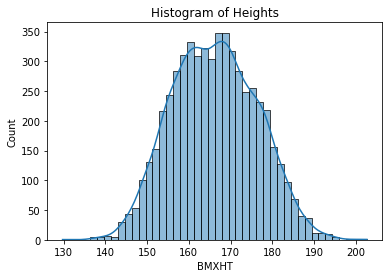

In [13]:
# Constructing a histogram of the distribution of heights using the BMXHT variable
# With default number of bins
# Dropping the missing cases using the dropna method before constructing the histogram.

sns.histplot(da.BMXHT.dropna(), kde = True).set_title("Histogram of Heights")
plt.show()

**Observation:** The distribution of heights is roughly bell-shaped, with a center of about 165cm, a range of roughly 70cm and no apparent outliers

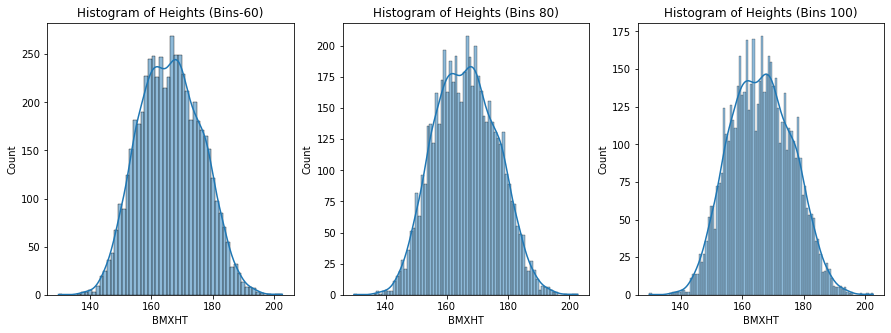

In [20]:
# different numbers of bins
plt.figure(1, figsize=(15,5))
plt.subplots_adjust(hspace=0.3)

# With bins set to 60
plt.subplot(1, 3, 1)
sns.histplot(da.BMXHT.dropna(), kde = True, bins = 60).set_title("Histogram of Heights (Bins-60)")

# With bins set to 80
plt.subplot(1, 3, 2)
sns.histplot(da.BMXHT.dropna(), kde = True, bins = 80).set_title("Histogram of Heights (Bins 80)")

# With bins set to 100
plt.subplot(1, 3, 3)
sns.histplot(da.BMXHT.dropna(), kde = True, bins = 100).set_title("Histogram of Heights (Bins 100)")
plt.show()

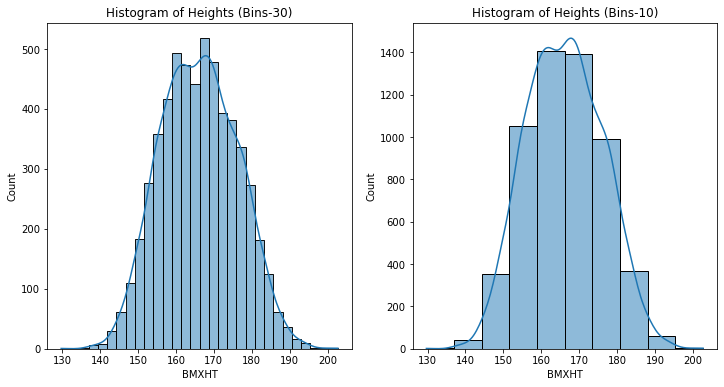

In [34]:
plt.figure(2, figsize=(12,6))
plt.subplots_adjust(hspace=0.3)

# With bins set to 30
plt.subplot(1, 2, 1)
sns.histplot(da.BMXHT.dropna(), kde = True, bins = 30).set_title("Histogram of Heights (Bins-30)")


# With bins set to 10
plt.subplot(1, 2, 2)
sns.histplot(da.BMXHT.dropna(), kde = True, bins = 10).set_title("Histogram of Heights (Bins-10)")
plt.show()

**Notable Observations from the Varying Number of Bins;**

As the number of bins grew excessively large the the data distribution began to look rough and the inability to discern the signal from the noise grew as well. On the other hand, as the number of bins grew excessively smaller, the data distribution began to lack the necessary details needed to discern any useful pattern.

### 2. Height by Gender

In [36]:
# Separate lists for the nominal and scale variables
myNom = da['RIAGENDRx']
myScale = da['BMXHT']

# List of booleans (true/false) that is True for each gender
myCat1 = myNom == 'Male'
myCat2 = myNom == 'Female'

# List of each scores per category, using the boolean lists
myCatScores1 = myScale[myCat1].dropna()
myCatScores2 = myScale[myCat2].dropna()

#### Split Histogram of Male and Female Heights

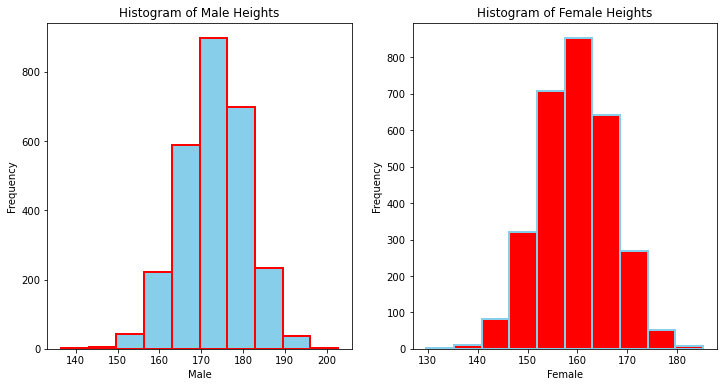

In [39]:
plt.figure(1, figsize=(12,6))
plt.subplots_adjust(hspace=0.3)

plt.subplot(1,2,1) # 2 rows, 1 column, plot 1
plt.hist(myCatScores1, color='skyblue', edgecolor='red', lw=2)
plt.title('Histogram of Male Heights')
plt.xlabel('Male')
plt.ylabel('Frequency')
 
plt.subplot(1, 2, 2) # 2 rows, 1 column, plot 2
plt.hist(myCatScores2, color='red', edgecolor='skyblue', lw=2)
plt.title('Histogram of Female Heights')
plt.xlabel('Female')
plt.ylabel('Frequency')


plt.show()

#### Side-by-Side Boxplots of Male and Female Heights

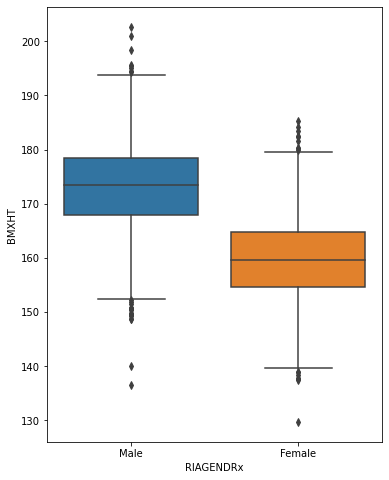

In [40]:
plt.figure(1, figsize=(6,8))
sns.boxplot(x=da["RIAGENDRx"], y = da["BMXHT"])
plt.show()

#### Combined Boxplots & Histogram of Male and Female Heights

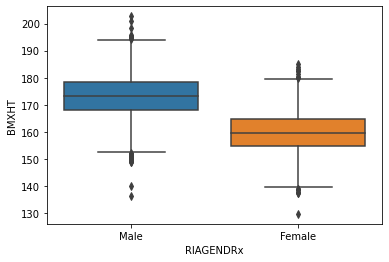

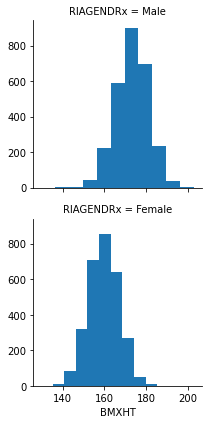

In [312]:
sns.boxplot(x=da["RIAGENDRx"], y = da["BMXHT"])

g = sns.FacetGrid(da, row = "RIAGENDRx")
g = g.map(plt.hist, "BMXHT")
plt.show()

**Observations on the Boxplot and Histogram Representation of the Male and  Female Heights:**

Due to the distribution being a normal bell-shaped one, all features represented on the histogram are clearly and even ore precisely represented in the boxplots.

However, the boxplots show more clearly;

* the center through the median line (male - 174, female - 160)
* the interquartile range (IQR) (male - 10, female - 10)
* the overall range (min-max) male - 42, female - 40
* the presence of outliers


Men are averagely taller than women with the shortest man being about 152cm while the shortest women is about 140cm, however, both men and women have almost equal spread when we look at the length of the boxes.


###  3. Within-subject differences between the first and second systolic blood pressure measurements ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

#### Blood pressures grouped by Age and Gender

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY2'>

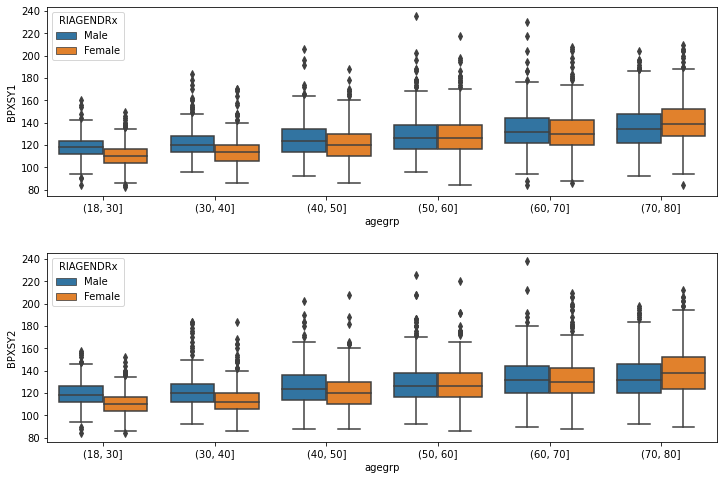

In [313]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.3)

plt.subplot(2,1,1)
sns.boxplot(x="agegrp", y="BPXSY1", hue="RIAGENDRx", data=da)

plt.subplot(2,1,2)
sns.boxplot(x="agegrp", y="BPXSY2", hue="RIAGENDRx", data=da)

**Observations on the Variations Between the Two SBP Readings:**
    
All subjects had almost similar SBP's for both blood pressure readings, no proportion of the subjects had a lower SBP significant enough on the second reading compared to the first reading. The difference between the first and second readings was less than 1 mm/Hg, so it is not visible in the "marginal" distributions shown

#### Differences between two systolic blood pressure variables.

Text(0, 0.5, 'Blood pressure in mm/Hg')

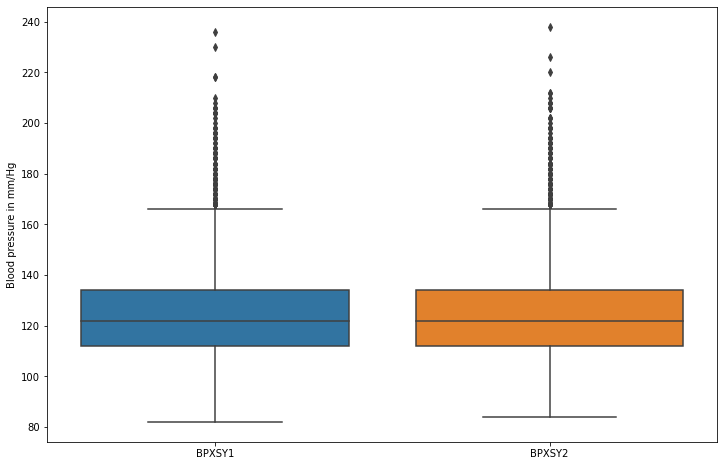

In [314]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]]).set_ylabel("Blood pressure in mm/Hg")

**Notable Observations:**

* As we go from young to old we see that generally blood pressures are rising 
* If we look at the length of the box from young to old, we are also seeing that older participants had more spread out blood pressures
* Then if we look at males versus females in the younger group, males had higher bp compared to females, however, the difference gets smaller as we go across the age groups and infact reverses in the final age

* As earlier stated, all subjects had almost similar SBP's for both blood pressure readings, no proportion of the subjects had a lower SBP significant enough on the second reading compared to the first reading. The difference between the first and second readings was less than 1 mm/Hg, so it is not visible in the "marginal" distributions shown